# 1. Persiapan Gambar:
- Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
- Tampilkan gambar asli menggunakan Python dan OpenCV.

In [1]:
!apt install tesseract-ocr
!apt-get install -y poppler-utils
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,994 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
# koneksi ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengimpor library re (regular expression), cv2 (OpenCV), numpy, dan pytesseract
import re
import cv2
import numpy as np
import pytesseract
# Mengimpor modul Output dari pytesseract dan matplotlib untuk plot gambar
from pytesseract import Output
from matplotlib import pyplot as plt
from PIL import Image


In [4]:
IMG_DIR = ('/content/drive/MyDrive/College/05 - Semester 5/ML/images/hitchhikers-rotated.png')

In [5]:
# Mengubah gambar menjadi citra dalam skala abu-abu
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menghilangkan noise dari gambar menggunakan median blur
def remove_noise(image):
    return cv2.medianBlur(image, 5)

# Melakukan thresholding pada gambar untuk menghasilkan citra biner
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Melakukan dilasi pada gambar dengan kernel 5x5
def dilate(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

# Melakukan erosi pada gambar dengan kernel 5x5
def erode(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

# Melakukan opening (erosi diikuti dengan dilasi) pada gambar dengan kernel 5x5
def opening(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Deteksi tepi menggunakan algoritma Canny
def canny(image):
    return cv2.Canny(image, 100, 200)

# Koreksi kemiringan pada gambar untuk mengembalikan gambar yang teratur
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle


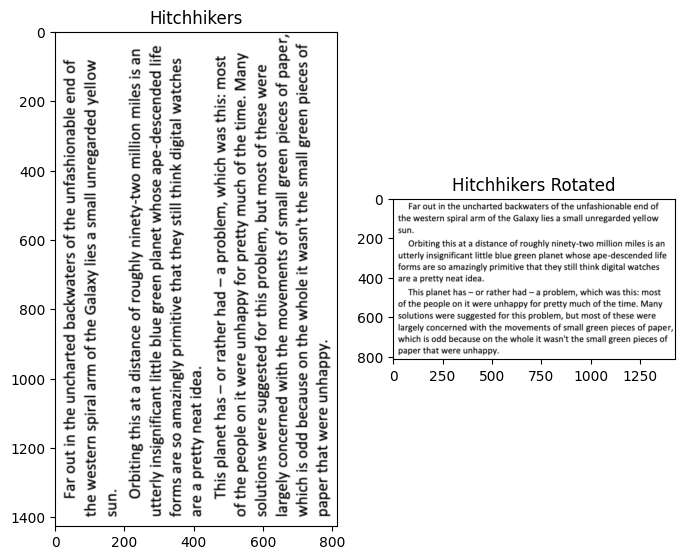

In [7]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR)

# Rotasi gambar 90 derajat searah jarum jam
image_rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan saluran warna (biru, hijau, merah) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image_rotated)

# Menggabungkan saluran warna dalam urutan RGB (Red-Green-Blue)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar sebelum dan sesudah dirotasi
plt.figure(figsize=(8, 8))

# Gambar sebelum dirotasi
plt.subplot(121), plt.imshow(image)
plt.title('Hitchhikers')

# Gambar setelah dirotasi
plt.subplot(122), plt.imshow(rgb_img)
plt.title('Hitchhikers Rotated')

plt.show()


In [8]:
# Preprocess

# Mengkonversi gambar yang telah dirotasi ke citra dalam skala abu-abu
gray = get_grayscale(image_rotated)

# Melakukan thresholding pada citra abu-abu
thresh = thresholding(gray)

# Melakukan operasi opening pada citra abu-abu
opening = opening(gray)

# Melakukan deteksi tepi menggunakan algoritma Canny pada citra abu-abu
canny = canny(gray)

# Menyimpan hasil dari setiap operasi ke dalam kamus 'images'
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}


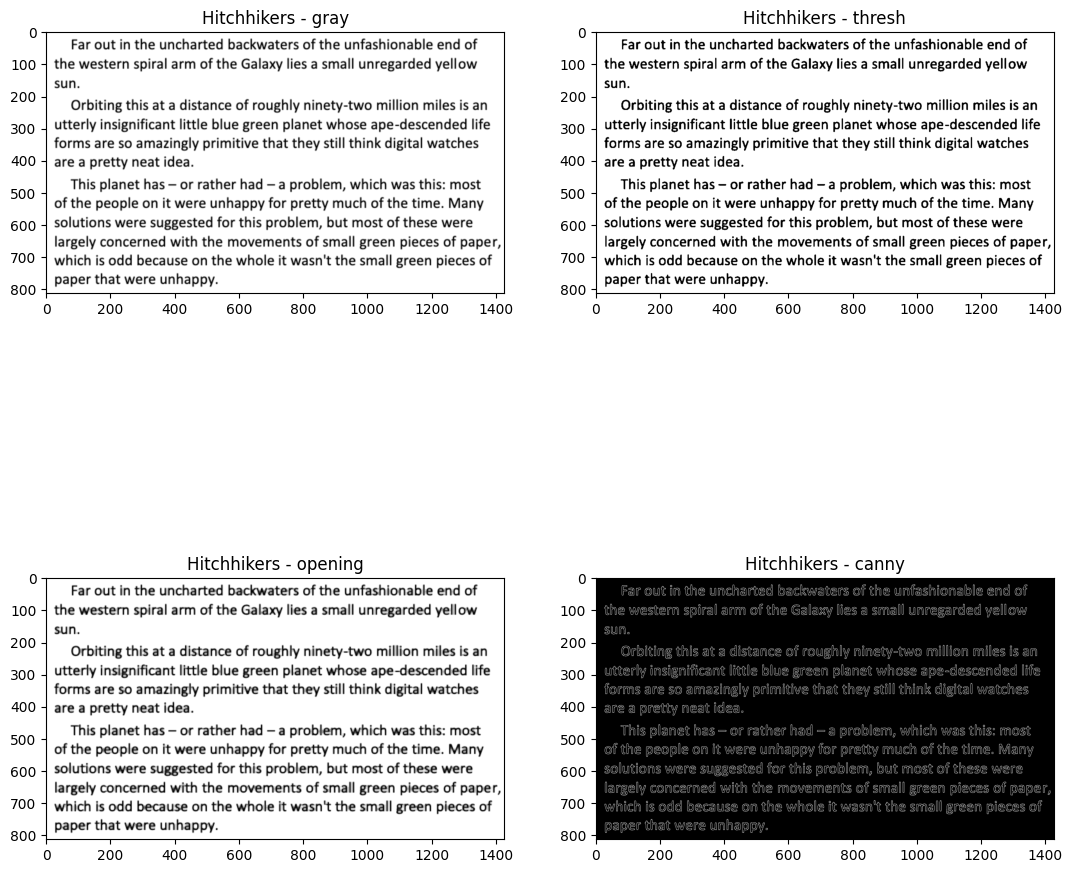

In [9]:
# Membuat figure baru dengan ukuran yang ditentukan
fig = plt.figure(figsize=(13,13))
ax = []

# Mengatur jumlah baris dan kolom pada plot
rows = 2
columns = 2

# Mengambil kunci (nama) dari setiap gambar hasil preprocessing
keys = list(images.keys())

# Melakukan iterasi sebanyak jumlah baris dikali jumlah kolom
for i in range(rows*columns):
    # Menambahkan subplot ke dalam figure
    ax.append( fig.add_subplot(rows, columns, i+1) )

    # Mengatur judul dari subplot
    ax[-1].set_title('Hitchhikers - ' + keys[i])

    # Menampilkan gambar hasil preprocessing dalam bentuk subplot dengan colormap 'gray'
    plt.imshow(images[keys[i]], cmap='gray')


# 2. Deteksi Orientasi dan Skrip:
- Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
- Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
- Tampilkan hasil orientasi dan jenis skrip.

In [10]:
# Konfigurasi khusus untuk pengenalan teks menggunakan Pytesseract
custom_config = r'--oem 3 --psm 6'

# Menampilkan header untuk output teks yang dihasilkan
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')

# Menggunakan Pytesseract untuk melakukan OCR pada gambar 'image'
# dan mencetak hasil teksnya berdasarkan konfigurasi khusus yang telah ditentukan
print(pytesseract.image_to_string(image, config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
-
w os
- St wu + 2 a °
oe = @ YOoOg on
°o Yue ome cqw
T= wn Vo ESve @G
oY ota wo SF OS
— nw
vo Eos ceee¢oe
= oOo _ En y
a oO a a + = o oO
so Caf or coc UVa
o Oo pa
Co = 9 & S2o2°% Mw
S$ Ee0 ZS 3 Es
ws a x Stuaé
£5 Qwest feo OMG
c Sus Soe
S= #388 SER?
fs FSS EEBER
Sa vo; YV>m ae
Oo w ce OU G o
gy 2 +A2S aanvs
= a c
> $28 o5 85H
& > os |f ae
s = og o>u oO
x<~ © - © W oO Sc
oOo WM _- o> ac
= <= ~ Os
So 9 ae ~«§ SLE
cx a a ofo w
32 cat $528 y
e
ro So? fBagteca
Co ¢ SEF. ce grnse?re
Sec sbEewpgosutevs
<c & or in | F MSG
> es CN= gH Meas
w@ & SER ®SCHAVZ YD
© 38 Y= a@f£OoqgEPs
=- & - 2 wa
~~” cic crore Gg
coc Seger eaoys
—_ i. —_
+ Oo ~ayb oO 5 0%
a 4+ = £Lc ved ¥ x
on Sr Bet acVus
. ¥ BS2z>yvart*BZyglFert
oF .S5E*C SCL GSS
uw c OW ree Sd m=z a
25 B52 -¥ oka
$a S26 on Sa



In [11]:
# Fungsi untuk mendapatkan orientasi teks pada gambar menggunakan Tesseract OCR
def get_text_orientation(image):
    # Konversi array NumPy (format OpenCV) ke objek PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
        # Menggunakan Tesseract OCR untuk mendapatkan sudut rotasi
        details = pytesseract.image_to_osd(pil_image)
        rotation_angle = float(details.split("\n")[1].split(":")[1])
        print(f"Sudut Rotasi dari OCR: {rotation_angle} derajat")
        return rotation_angle
    except Exception as e:
        print(f"Error: {e}")
        return None

# Mendapatkan sudut rotasi dari gambar
rotation_angle = get_text_orientation(image)

# Menampilkan sudut rotasi jika berhasil didapatkan
if rotation_angle is not None:
    print(f"Sudut Rotasi: {rotation_angle} derajat")


Sudut Rotasi dari OCR: 270.0 derajat
Sudut Rotasi: 270.0 derajat


In [12]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Far out in the 

In [13]:
def get_text_orientation(image):
    # Convert NumPy array to PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
        # Menggunakan Tesseract OCR untuk mendapatkan sudut rotasi
        details = pytesseract.image_to_osd(pil_image)
        rotation_angle = float(details.split("\n")[1].split(":")[1])
        print(f"Sudut Rotasi dari OCR: {rotation_angle} derajat")
        return rotation_angle
    except Exception as e:
        print(f"Error: {e}")
        return None

# Mendapatkan sudut rotasi teks pada gambar yang telah dirotasi
rotation_angle = get_text_orientation(image_rotated)

# Menampilkan sudut rotasi jika berhasil didapatkan
if rotation_angle is not None:
    print(f"Sudut Rotasi: {rotation_angle} derajat")

Sudut Rotasi dari OCR: 0.0 derajat
Sudut Rotasi: 0.0 derajat
